# Salary Prediction using Linear Regression

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("Salary Data.csv", sep=',')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


# EDA

In [3]:
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

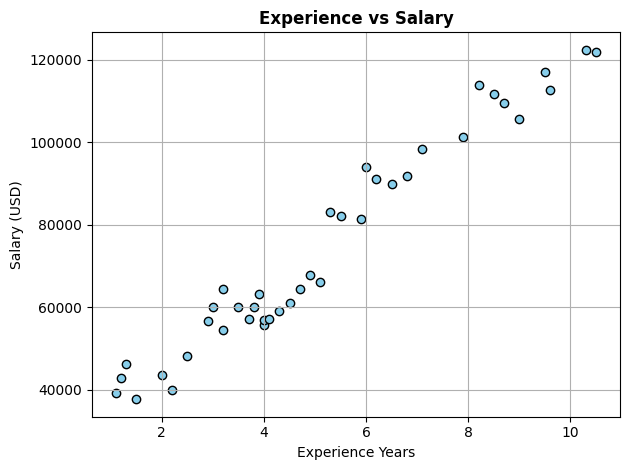

In [43]:
plt.scatter(df['Experience Years'], df['Salary'], color='skyblue', edgecolors='black' )

plt.xlabel('Experience Years')
plt.ylabel('Salary (USD)')
plt.title('Experience vs Salary',fontweight='bold')
plt.grid()
plt.tight_layout()


In [4]:
x= df.drop('Salary', axis=1)
x.head()

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


In [7]:
y=df[['Salary']]
y.head()

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525


# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [8]:
x.mean()

Experience Years    5.1525
dtype: float64

In [9]:
y.mean()

Salary    74743.625
dtype: float64

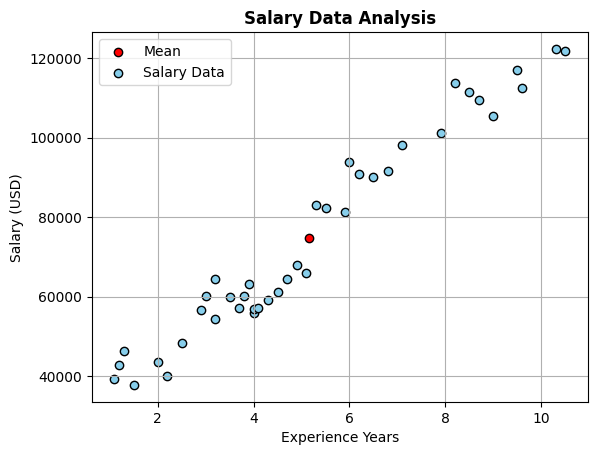

In [14]:
plt.scatter(x.mean(), y.mean(), color='red', edgecolors= 'black', label='Mean')
plt.scatter(df['Experience Years'], df['Salary'], color='skyblue', edgecolors='black', label='Salary Data' )

plt.xlabel('Experience Years')
plt.ylabel('Salary (USD)')
plt.title('Salary Data Analysis',fontweight='bold')
plt.grid()
plt.legend()

In [21]:
reg.fit(x, y)

LinearRegression()

In [25]:
m=reg.coef_
m

array([[9523.65050742]])

In [23]:
c=reg.intercept_
c

array([25673.01576053])

In [26]:
#y=mx+c
m*11+c

array([[130433.17134213]])

In [28]:
df['Predicted_y']= reg.predict(x)
df.head()

,Experience Years,Salary,Predicted_y
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


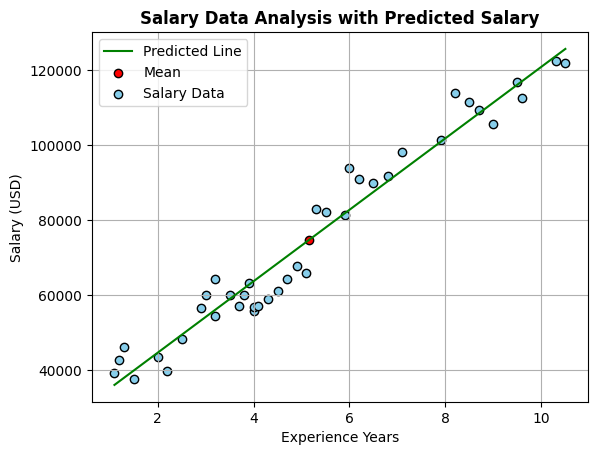

In [44]:
plt.plot(x, reg.predict(x), color= 'green', label= 'Predicted Line')
plt.scatter(x.mean(), y.mean(), color='red', edgecolors= 'black', label='Mean')
plt.scatter(df['Experience Years'], df['Salary'], color='skyblue', edgecolors='black', label='Salary Data' )

plt.xlabel('Experience Years')
plt.ylabel('Salary (USD)')
plt.title('Salary Data Analysis with Predicted Salary',fontweight='bold')
plt.grid()
plt.legend()

**Cost and Lose**

In [34]:
df['lose']=df['Salary'] - df['Predicted_y']
df.head()

,Experience Years,Salary,Predicted_y,lose
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


**Model Accuracy**

In [35]:
reg.score(x,y)

0.9558814451799361

Perfomance = 95.58%